# Content

1. [Import](#import)
2. [Data Preparation](#data_prep)
<br>
3. Correlations
    - 3.1. [For Linear Regression](#linear_cor)
    - 3.2. [For Logistic Regression](#logistic_cor)
<br>    
4. Linear Regression
    - 4.1. [Visualization](#linear_viz)
    - 4.2. [Model Performance Evaluation](#linear_eva)
    - 4.3. [Before vs After Regularization](#linear_dif)
    - 4.4. [Operation of the optimized linear regression model](#new_linear)
<br>    
5. Logistic Regression
    - 5.1. [Visualization](#logistic_viz)
    - 5.2. [Model Performance Evaluation](#logistic_eva)
    - 5.3. [Before vs After Regularization](#logistic_dif)
    - 5.4. [Operation of the optimized logistin regression model](#new_logistic)
<br>
6. [New Data Perfomance](#new_data)
## Project on Data Analysis and Machine Learning to Predict Adidas Profits

<a id='import'></a>
# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## DS

In [3]:
data = pd.read_excel('Adidas US Sales Datasets.xlsx')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


<a id='data_prep'></a>
# Data preparation

1. Find the names of the columns in the data set
2. Renaming columns using the correct nomenclature
3. Removing an empty column
4. Filter the dataset to remove columns with missing data
5. Present findings

In [4]:
colunas = data.loc[3]
data = data.rename(columns=colunas)
data = data.drop(data.columns[0], axis=1)
data = data[4:]
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [5]:
print("\n", data.shape) 
print("\n", data.describe()) 


 (9648, 13)

            Retailer  Retailer ID         Invoice Date Region       State  \
count          9648         9648                 9648   9648        9648   
unique            6            4                  724      5          50   
top     Foot Locker      1185732  2021-01-17 00:00:00   West  California   
freq           2637         5265                   77   2448         432   

            City                Product  Price per Unit  Units Sold  \
count       9648                   9648            9648        9648   
unique        52                      6             146         361   
top     Portland  Men's Street Footwear              50         225   
freq         360                   1610             557         207   

        Total Sales  Operating Profit  Operating Margin Sales Method  
count          9648              9648           9648.00         9648  
unique         3512              6510            127.00            3  
top          100000             210

In [6]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

# Column renaming

In [8]:
data.columns = ['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City', 'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin', 'Sales_Method']
data.head()

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


# Remove '$' and ',' characters from numeric columns and convert to numeric data type

In [9]:
numeric_columns = ['Price_per_Unit', 'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']
for column in numeric_columns:
    data[column] = data[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

<a id='outliers'></a>
# Check for outliers

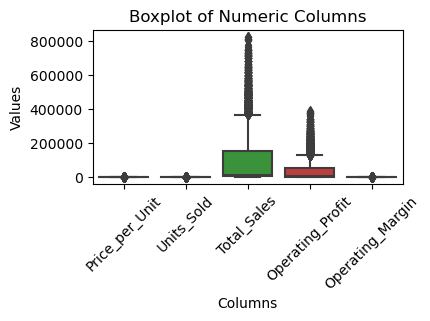

In [10]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

<a id='linear_cor'></a>
# Correlations between numeric variables and target variable

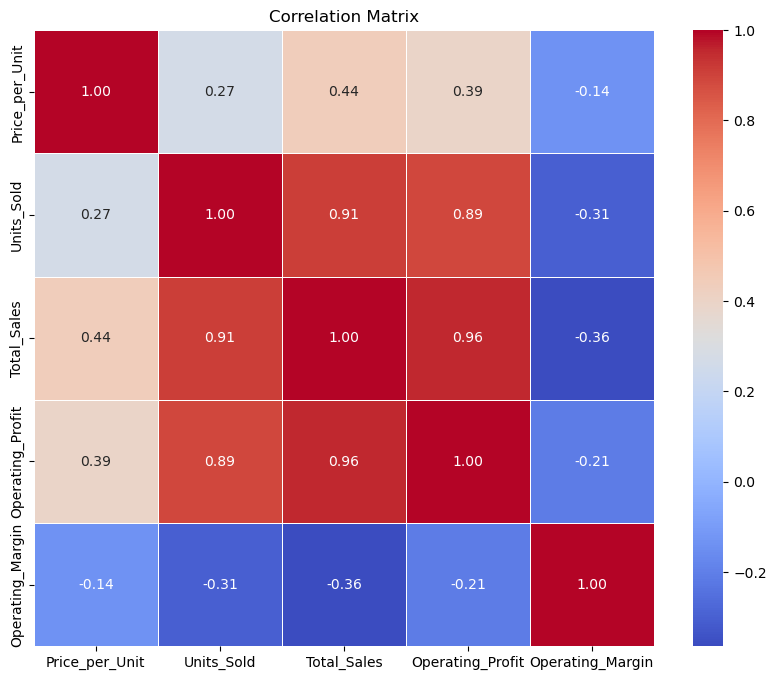

In [11]:
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Units_sold & Total_Sales - 91% <br>
* Units_sold & Operating_Profit - 89% <br>
* Operating_Profi & Total_Sales - 96% <br>
* Price_per_Unit * Total_Sales - 44% <br>

In [12]:
correlation_matrix

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
Price_per_Unit,1.000000,0.265869,0.435811,0.394546,-0.137486
Units_Sold,0.265869,1.000000,0.913431,0.892379,-0.305479
Total_Sales,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating_Profit,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating_Margin,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


<a id='linear_reg'></a>
# Linear regression 

In [13]:
X = data[['Operating_Profit', 'Units_Sold', 'Price_per_Unit']]  # Features
y = data['Total_Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Prediction on test data
y_pred_linear = linear_reg_model.predict(X_test)

# Performance evaluation of linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear regression:")
print("(MSE):", mse_linear.round(4))
print("(R^2):", r2_linear.round(4))

Linear regression:
(MSE): 1253241097.9139
(R^2): 0.9386


<a id='linear_viz'></a>
# Actual vs Predicted

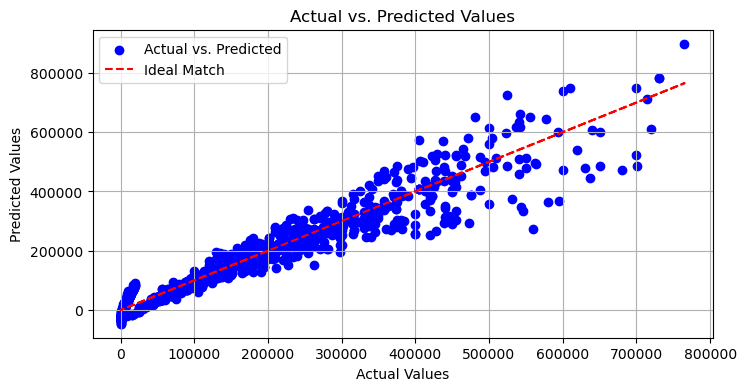

In [14]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Match')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

<a id='linear_eva'></a>
# Model Perfomance Evaluating (Linear  Regression)

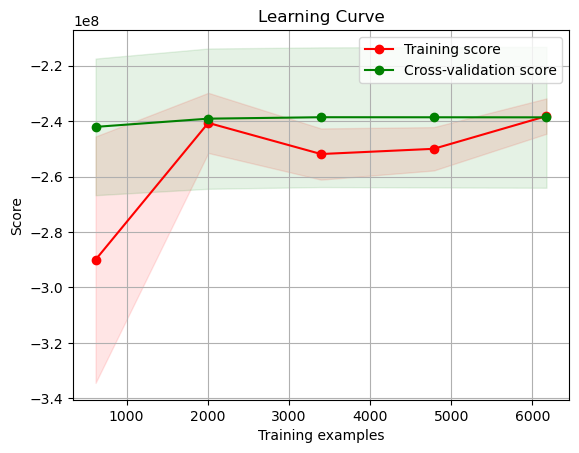

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X = data[['Total_Sales', 'Units_Sold', 'Price_per_Unit']] 
y = data['Operating_Profit']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()

plot_learning_curve(linear_reg_model, "Learning Curve", X_train, y_train, cv=5)

plt.show()

The green line does not follow the way and shows lower performance on cross-validation, this may indicate that the model is overtrained and does not generalize well to new examples.

In [16]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=7)),  
    ('scaler', StandardScaler()),            
    ('linear_reg', LinearRegression())       
])

poly_pipeline.fit(X_train, y_train)

y_pred_poly = poly_pipeline.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression:")
print("(MSE):", mse_poly.round(4))
print("(R^2):", r2_poly.round(4))


Polynomial Regression:
(MSE): 247545936.3459
(R^2): 0.918


BEFORE PolynomialFeatures: (MSE): 1 253 241 097.9 & (R^2): 0.9386 <br>
AFTER  PolynomialFeatures: (MSE):   247 545 936.3 & (R^2): 0.9180 <br>

<a id='linear_dif'></a>
# Vizual Difference

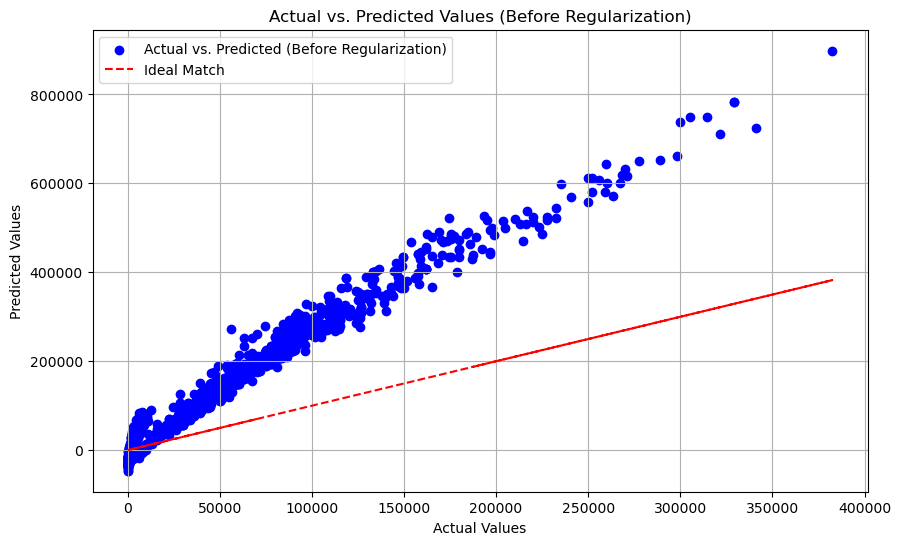

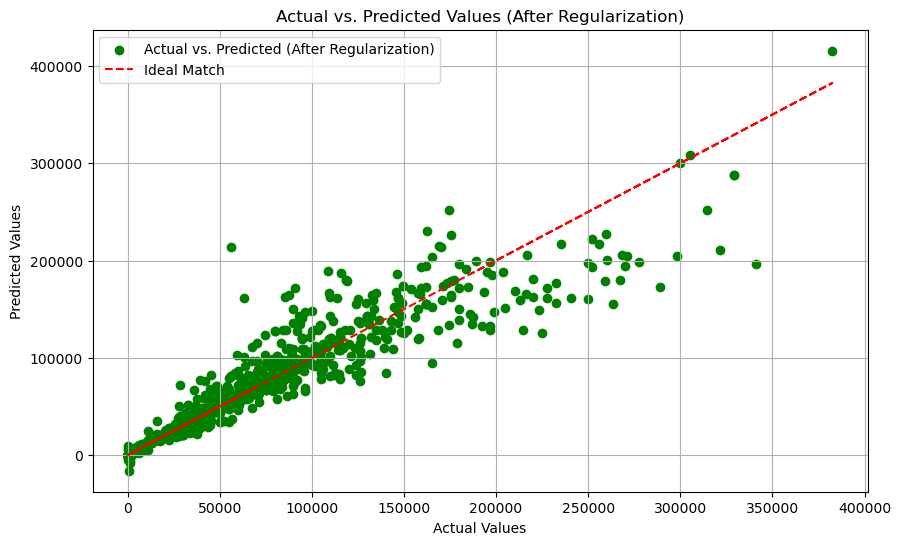

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs. Predicted (Before Regularization)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Match')
plt.title('Actual vs. Predicted Values (Before Regularization)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='green', label='Actual vs. Predicted (After Regularization)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Match')
plt.title('Actual vs. Predicted Values (After Regularization)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

The reduction in MSE and a slight decrease in R^2 after applying PolynomialFeatures indicate that the model has become more stable and generalizable. This is an important result that can improve the predictive ability of the model on new data.

<a id='logistic_reg'></a>
# Logistic Regression

In [18]:
mean_operating_profit = data['Operating_Profit'].mean()
mean_operating_profit.round(2)

34425.24

# Creating binary target variable

In [19]:
data['Successful_Sale'] = np.where(data['Operating_Profit'] > mean_operating_profit, 1, 0)
data.head()

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method,Successful_Sale
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1


<a id='logistic_cor'></a>
# Correlations between numeric variables and target variable

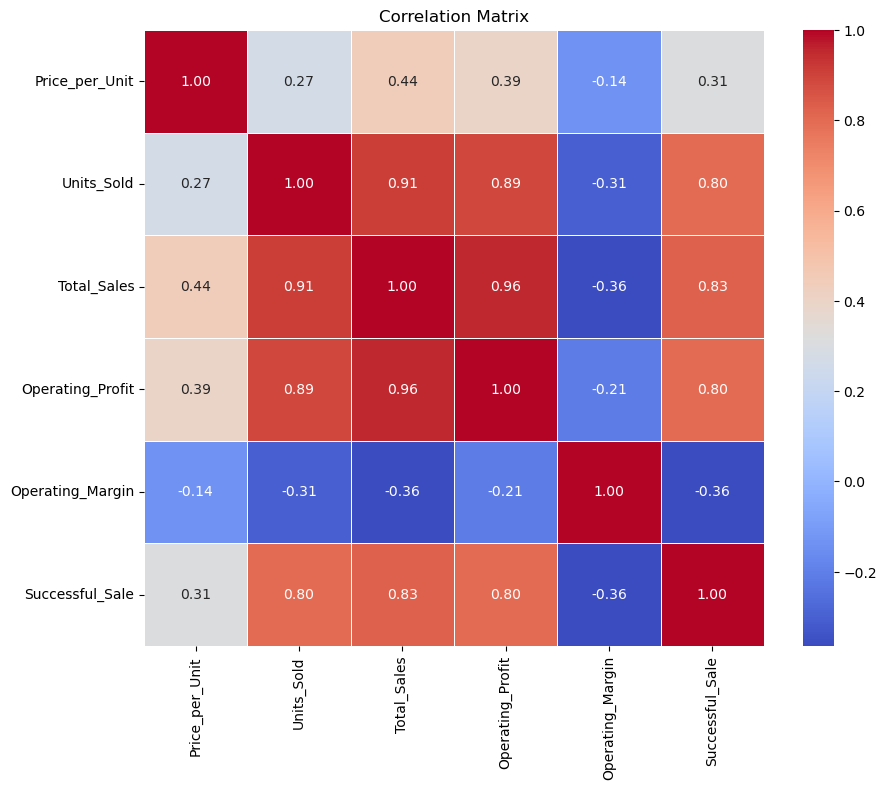

In [20]:
numeric_columns = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
correlation_matrix

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Successful_Sale
Price_per_Unit,1.000000,0.265869,0.435811,0.394546,-0.137486,0.309060
Units_Sold,0.265869,1.000000,0.913431,0.892379,-0.305479,0.801969
Total_Sales,0.435811,0.913431,1.000000,0.956307,-0.364592,0.828294
Operating_Profit,0.394546,0.892379,0.956307,1.000000,-0.211920,0.797991
Operating_Margin,-0.137486,-0.305479,-0.364592,-0.211920,1.000000,-0.361445
Successful_Sale,0.309060,0.801969,0.828294,0.797991,-0.361445,1.000000


In [22]:
X = data[['Price_per_Unit', 'Units_Sold']]  # features
y = data['Successful_Sale']  # Target_variable

#train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

# test predictions
y_pred = logistic_reg_model.predict(X_test)

# estimating
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("ROC AUC Score:", roc_auc.round(2))

Logistic Regression Model Performance:
Accuracy: 0.94
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
ROC AUC Score: 0.92


<a id='logistic_viz'></a>
# Vizualization

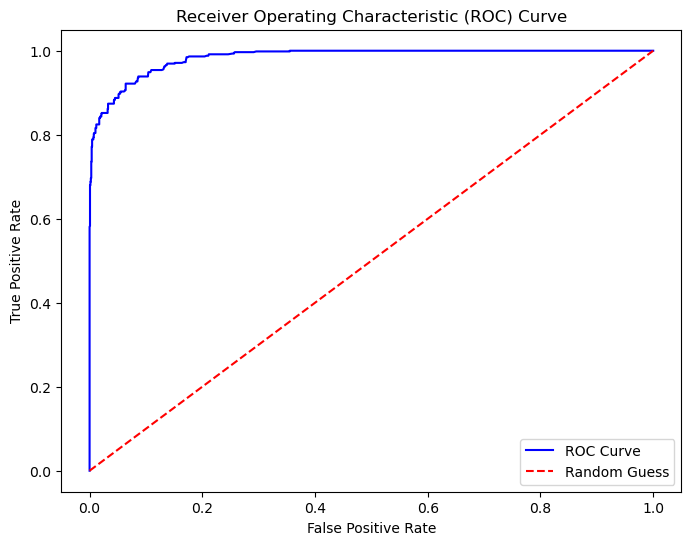

In [23]:
y_pred_proba = logistic_reg_model.predict_proba(X_test)[:,1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

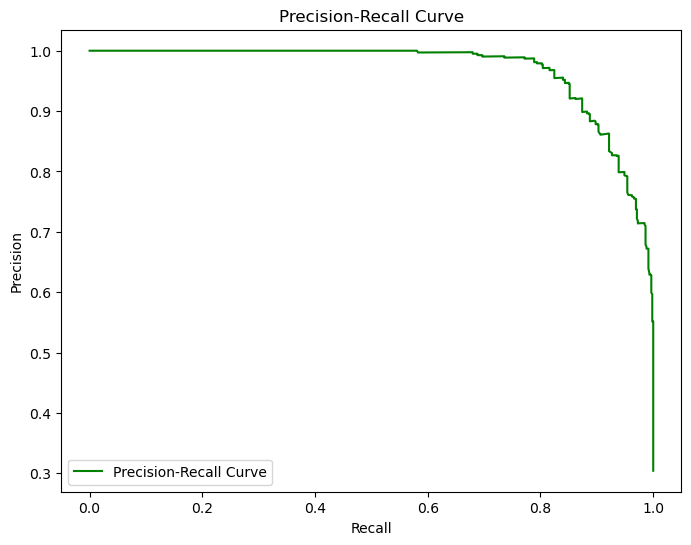

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1295   48]
 [  74  513]]


<a id='logistic_eva'></a>
# Model Perfomance Evaluating (Logistic  Regression)

In [26]:
accuracy_train = accuracy_score(y_train, logistic_reg_model.predict(X_train))
accuracy_test = accuracy_score(y_test, logistic_reg_model.predict(X_test))

print("Accuracy on Training Data:", accuracy_train)
print("Accuracy on Testing Data:", accuracy_test)

if accuracy_train > accuracy_test:
    print("The logistic regression model may be overfitting.")
elif accuracy_train < accuracy_test:
    print("The logistic regression model may be underfitting.")
else:
    print("The logistic regression model seems to be appropriately fitting the data.")

Accuracy on Training Data: 0.9437678154962426
Accuracy on Testing Data: 0.9367875647668393
The logistic regression model may be overfitting.


In [27]:
accuracy_train = accuracy_score(y_train, logistic_reg_model.predict(X_train))
precision_train = precision_score(y_train, logistic_reg_model.predict(X_train))
recall_train = recall_score(y_train, logistic_reg_model.predict(X_train))
f1_train = f1_score(y_train, logistic_reg_model.predict(X_train))
roc_auc_train = roc_auc_score(y_train, logistic_reg_model.predict_proba(X_train)[:,1])

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
roc_auc_test = roc_auc_score(y_test, logistic_reg_model.predict_proba(X_test)[:,1])

print("Performance Metrics for Regular Logistic Regression:")
print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1 Score:", f1_train)
print("Training ROC AUC Score:", roc_auc_train)

print("\nTesting Accuracy:", accuracy_test)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1 Score:", f1_test)
print("Testing ROC AUC Score:", roc_auc_test)

Performance Metrics for Regular Logistic Regression:
Training Accuracy: 0.9437678154962426
Training Precision: 0.9302426343154246
Training Recall: 0.8871900826446281
Training F1 Score: 0.9082064297800337
Training ROC AUC Score: 0.9864054812513063

Testing Accuracy: 0.9367875647668393
Testing Precision: 0.9144385026737968
Testing Recall: 0.8739352640545145
Testing F1 Score: 0.8937282229965157
Testing ROC AUC Score: 0.9839593526151754


In [28]:
logistic_reg_model_regularized = LogisticRegression(penalty='l2')
logistic_reg_model_regularized.fit(X_train, y_train)
y_pred_regularized = logistic_reg_model_regularized.predict(X_test)

# l2 regularization
accuracy_train_regularized = accuracy_score(y_train, logistic_reg_model_regularized.predict(X_train))
precision_train_regularized = precision_score(y_train, logistic_reg_model_regularized.predict(X_train))
recall_train_regularized = recall_score(y_train, logistic_reg_model_regularized.predict(X_train))
f1_train_regularized = f1_score(y_train, logistic_reg_model_regularized.predict(X_train))
roc_auc_train_regularized = roc_auc_score(y_train, logistic_reg_model_regularized.predict_proba(X_train)[:,1])

accuracy_test_regularized = accuracy_score(y_test, logistic_reg_model_regularized.predict(X_test))
precision_test_regularized = precision_score(y_test, logistic_reg_model_regularized.predict(X_test))
recall_test_regularized = recall_score(y_test, logistic_reg_model_regularized.predict(X_test))
f1_test_regularized = f1_score(y_test, logistic_reg_model_regularized.predict(X_test))
roc_auc_test_regularized = roc_auc_score(y_test, logistic_reg_model_regularized.predict_proba(X_test)[:,1])

print("\nPerformance Metrics for Regularized Logistic Regression (L2):")
print("Training Accuracy:", accuracy_train_regularized)
print("Training Precision:", precision_train_regularized)
print("Training Recall:", recall_train_regularized)
print("Training F1 Score:", f1_train_regularized)
print("Training ROC AUC Score:", roc_auc_train_regularized)

print("\nTesting Accuracy:", accuracy_test_regularized)
print("Testing Precision:", precision_test_regularized)
print("Testing Recall:", recall_test_regularized)
print("Testing F1 Score:", f1_test_regularized)
print("Testing ROC AUC Score:", roc_auc_test_regularized)


Performance Metrics for Regularized Logistic Regression (L2):
Training Accuracy: 0.9437678154962426
Training Precision: 0.9302426343154246
Training Recall: 0.8871900826446281
Training F1 Score: 0.9082064297800337
Training ROC AUC Score: 0.9864054812513063

Testing Accuracy: 0.9367875647668393
Testing Precision: 0.9144385026737968
Testing Recall: 0.8739352640545145
Testing F1 Score: 0.8937282229965157
Testing ROC AUC Score: 0.9839593526151754


<a id='logistic_dif'></a>
# Vizual Difference

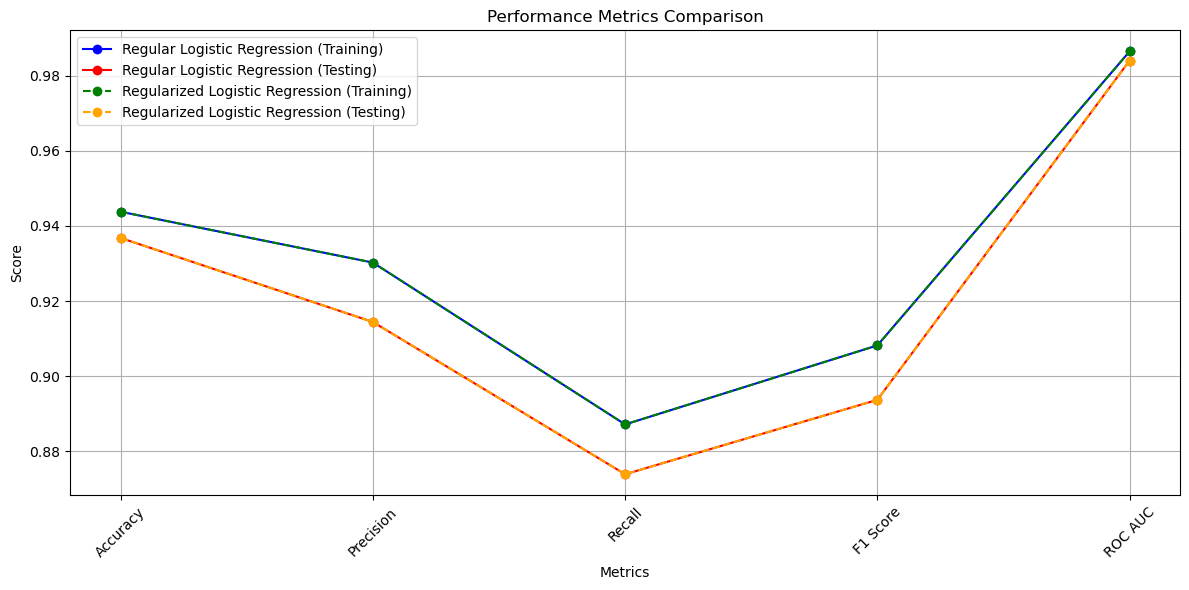

In [29]:
metrics_train = [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]
metrics_test = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

metrics_train_regularized = [accuracy_train_regularized, precision_train_regularized, recall_train_regularized, f1_train_regularized, roc_auc_train_regularized]
metrics_test_regularized = [accuracy_test_regularized, precision_test_regularized, recall_test_regularized, f1_test_regularized, roc_auc_test_regularized]

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

plt.figure(figsize=(12, 6))

plt.plot(metric_names, metrics_train, marker='o', label='Regular Logistic Regression (Training)', color='blue')
plt.plot(metric_names, metrics_test, marker='o', label='Regular Logistic Regression (Testing)', color='red')

plt.plot(metric_names, metrics_train_regularized, marker='o', label='Regularized Logistic Regression (Training)', linestyle='dashed', color='green')
plt.plot(metric_names, metrics_test_regularized, marker='o', label='Regularized Logistic Regression (Testing)', linestyle='dashed', color='orange')

plt.title('Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.legend()

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The model's performance on the test dataset does not change after applying regularization, which may mean that the model was already well generalized and did not suffer from overfitting before. This is a good result and indicates that the model has good generalization ability and copes well with new data.

# Random Forest implementing

In [30]:
X = data[['Price_per_Unit', 'Units_Sold']]
y = data['Successful_Sale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("ROC AUC Score:", roc_auc.round(2))

Random Forest Model Performance:
Accuracy: 0.98
Precision: 0.95
Recall: 0.97
F1 Score: 0.96
ROC AUC Score: 0.97


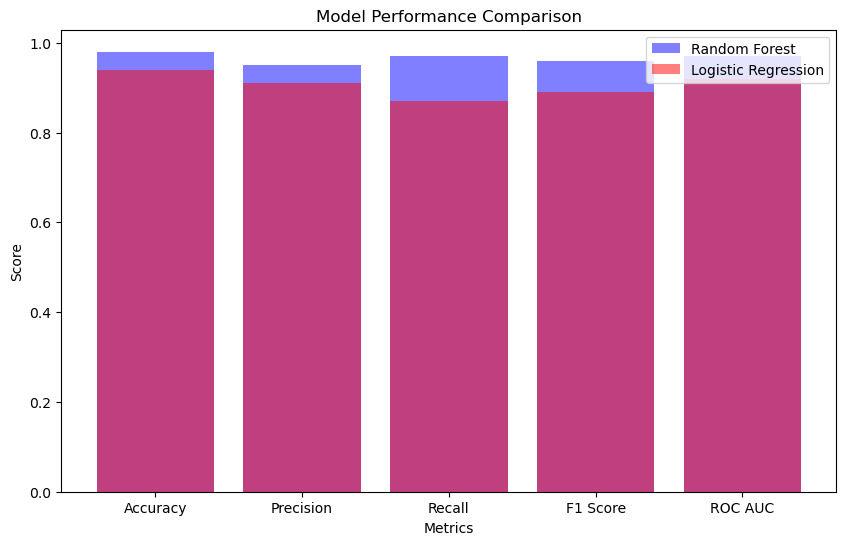

In [31]:
# random forest
rf_accuracy = 0.98
rf_precision = 0.95
rf_recall = 0.97
rf_f1 = 0.96
rf_roc_auc = 0.97

# logistic regression
lr_accuracy = 0.94
lr_precision = 0.91
lr_recall = 0.87
lr_f1 = 0.89
lr_roc_auc = 0.92

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc]
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc]

plt.figure(figsize=(10, 6))
plt.bar(metrics, rf_scores, color='b', alpha=0.5, label='Random Forest')
plt.bar(metrics, lr_scores, color='r', alpha=0.5, label='Logistic Regression')
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()

In [32]:
y_pred_logistic = logistic_reg_model.predict(X_test)
conf_matrix_logistic_original = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix (Logistic Regression - Original Data):")
print(conf_matrix_logistic_original)
print()
y_pred_forest = random_forest_model.predict(X_test)
conf_matrix_forest_original = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix (Random Forest - Original Data):")
print(conf_matrix_forest_original)

Confusion Matrix (Logistic Regression - Original Data):
[[1295   48]
 [  74  513]]

Confusion Matrix (Random Forest - Original Data):
[[1315   28]
 [  19  568]]


<a id='new_linear'></a>
# Operation of the optimized linear regression model on the data x 2

In [33]:
doubled_data = pd.concat([data, data], ignore_index=True)

X_doubled = doubled_data[['Price_per_Unit', 'Units_Sold']]
y_doubled = doubled_data['Successful_Sale']

poly_pipeline.fit(X_doubled, y_doubled)

y_pred_poly_doubled = poly_pipeline.predict(X_test)

mse_poly_doubled = mean_squared_error(y_test, y_pred_poly_doubled)
r2_poly_doubled = r2_score(y_test, y_pred_poly_doubled)

print("\nPolynomial Regression on Doubled Data:")
print("(MSE):", mse_poly_doubled.round(4))
print("(R^2):", r2_poly_doubled.round(4))


Polynomial Regression on Doubled Data:
(MSE): 0.0495
(R^2): 0.7659


<a id='new_logistic'></a>
# Operation of the optimized logistic regression model on the data x 2

In [34]:
doubled_data = pd.concat([data, data], ignore_index=True)

X_doubled = doubled_data[['Price_per_Unit', 'Units_Sold']]
y_doubled = doubled_data['Successful_Sale']

X_train_doubled, X_test_doubled, y_train_doubled, y_test_doubled = train_test_split(X_doubled, y_doubled, test_size=0.2, random_state=42)

random_forest_model.fit(X_train_doubled, y_train_doubled)

y_pred_doubled = random_forest_model.predict(X_test_doubled)

accuracy_doubled = accuracy_score(y_test_doubled, y_pred_doubled)
precision_doubled = precision_score(y_test_doubled, y_pred_doubled)
recall_doubled = recall_score(y_test_doubled, y_pred_doubled)
f1_doubled = f1_score(y_test_doubled, y_pred_doubled)
roc_auc_doubled = roc_auc_score(y_test_doubled, y_pred_doubled)

print("Random Forest Model Performance on Doubled Data:")
print("Accuracy:", accuracy_doubled.round(4))
print("Precision:", precision_doubled.round(4))
print("Recall:", recall_doubled.round(4))
print("F1 Score:", f1_doubled.round(4))
print("ROC AUC Score:", roc_auc_doubled.round(4))

Random Forest Model Performance on Doubled Data:
Accuracy: 0.979
Precision: 0.958
Recall: 0.9749
F1 Score: 0.9664
ROC AUC Score: 0.9779


<a id='new_data'></a>
# New Data Perfomance

In [61]:
new_data = pd.read_excel('new_data.xlsx')
new_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [62]:
new_data = pd.read_excel('new_data.xlsx')

colunas = new_data.loc[3]
new_data.columns = new_data.iloc[3]

new_data = new_data.drop(columns=new_data.columns[0])

new_data = new_data.iloc[4:]
new_data.head(10)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Emir,321321,2023-02-01 00:00:00,Almaty,New York,Branson,Shoes,150,800,120000,300000,0.3,In-store
6,Darya,3213123,2023-02-01 00:00:00,Astana,Missouri,California,Air Max,260,300,78000,300000,0.4,In-store
7,Inkgar,4324,2024-04-05 00:00:00,Uskemen,LA,Washington,SB,39,245,9555,300000,0.1,In-store
8,Nazar,213123,2004-09-23 00:00:00,New-York,California,New York,Ozweego,21,870,18270,300000,0.2,In-store
9,Amina,34214,2024-10-08 00:00:00,Branson,Irigon,Almaty,Kanya Y-3,999.99,9875,9874901.25,300000,0.9,In-store


In [63]:
new_data.columns = ['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City', 'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin', 'Sales_Method']
new_data.head(10)

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Emir,321321,2023-02-01 00:00:00,Almaty,New York,Branson,Shoes,150,800,120000,300000,0.3,In-store
6,Darya,3213123,2023-02-01 00:00:00,Astana,Missouri,California,Air Max,260,300,78000,300000,0.4,In-store
7,Inkgar,4324,2024-04-05 00:00:00,Uskemen,LA,Washington,SB,39,245,9555,300000,0.1,In-store
8,Nazar,213123,2004-09-23 00:00:00,New-York,California,New York,Ozweego,21,870,18270,300000,0.2,In-store
9,Amina,34214,2024-10-08 00:00:00,Branson,Irigon,Almaty,Kanya Y-3,999.99,9875,9874901.25,300000,0.9,In-store


In [64]:
numeric_columns = ['Price_per_Unit', 'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']
for column in numeric_columns:
    new_data[column] = new_data[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [67]:
X_new = new_data[['Price_per_Unit', 'Units_Sold']]
y_new = new_data['Total_Sales']

y_pred_poly_new = poly_pipeline.predict(X_new)

mse_poly_new = mean_squared_error(y_new, y_pred_poly_new)
r2_poly_new = r2_score(y_new, y_pred_poly_new)

print("\nPolynomial Regression Model Performance on new_data:")
print("(MSE):", mse_poly_new.round(4))
print("(R^2):", r2_poly_new.round(4))


Polynomial Regression Model Performance on new_data:
(MSE): 2.0203756550828433e+19
(R^2): -1538154.5225


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'poly__degree': [2, 3, 4, 5, 6, 7]}

poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  
    ('scaler', StandardScaler()),            
    ('linear_reg', LinearRegression())       
])

grid_search = GridSearchCV(poly_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
y_pred_optimal = grid_search.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

print("\nOptimized Polynomial Regression Model Performance:")
print("(MSE):", mse_optimal.round(4))
print("(R^2):", r2_optimal.round(4))

Best parameters: {'poly__degree': 7}

Optimized Polynomial Regression Model Performance:
(MSE): 0.0423
(R^2): 0.7999
